In [1]:
import numpy as np
import networkx as nx
from itertools import product

grid = np.genfromtxt("inputs/day23.txt", delimiter=1, dtype=str, comments=None)

entrance, exit = (0,1), (grid.shape[0]-1, grid.shape[1]-2)

# Part 1

In [2]:
G = nx.DiGraph()
for (i, x), (dir, slope) in product(np.ndenumerate(grid), zip(((0,1),(1,0),(-1,0),(0,-1)), (">", "v", "^", "<"))):
    if x != "#":
        step = (i[0] + dir[0], i[1] + dir[1]) 
        if (0 < step[0] < grid.shape[0]) and (0 < step[1] < grid.shape[1]) and (grid[*step] in (".", slope)):
            G.add_edge(i, step, weight=1)

max((nx.path_weight(G, p, weight='weight') for p in nx.all_simple_paths(G, entrance, exit)))

2018

# Part 2

In [4]:
G = nx.Graph()
for (i, x), dir in product(np.ndenumerate(grid), ((0,1),(1,0),(-1,0),(0,-1))):
    if x != "#":
        step = (i[0] + dir[0], i[1] + dir[1]) 
        if (0 < step[0] < grid.shape[0]) and (0 < step[1] < grid.shape[1]) and grid[*step] in (".", "<", ">", "^", "v"):
            G.add_edge(i, step, weight=1)

for node in G.copy().nodes:
    if G.degree(node)==2:
        G.add_edge(*nx.neighbors(G, node), weight=sum([e[2]['weight'] for e in list(G.edges(node, data=True))]))
        G.remove_node(node)

_max = 0
_max_p = None
for p in nx.all_simple_paths(G, entrance, exit):
    if (_new := nx.path_weight(G, p, weight='weight')) > _max:
        _max = _new
        _max_p = p
_max


6406

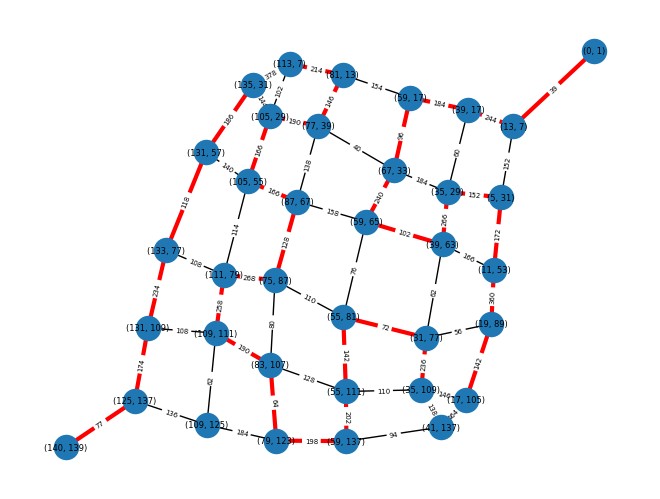

In [14]:
labels = nx.get_edge_attributes(G,'weight')
pos=nx.spring_layout(G)
nx.draw(G, pos=pos,with_labels=True, font_size=6)
nx.draw_networkx_edges(G,pos=pos,edgelist=[(u,v) for u, v in zip(_max_p, _max_p[1:])],edge_color ='red', width=3)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels, font_size=5);

# Part 1 without nx

In [6]:
with open("inputs/day23.txt", "r") as fn:
    input = fn.read()

lines = input.splitlines() 

dirs = ((0,1),(1,0),(-1,0),(0,-1))

slope_map = {
    (0,1): ">",
    (1,0): "v",
    (-1,0): "^",
    (0,-1): "<"
}

solutions = list()
def solve(path):
    global global_solutions
    if path[-1]==exit:
        solutions.append(path)    
    
    for dir in dirs:
        step = (path[-1][0] + dir[0], path[-1][1] + dir[1])

        in_bounds = (0 < step[0] < len(lines)) and (0 < step[1] < len(lines[0]))
        is_path = lines[step[0]][step[1]] in (".", slope_map[dir]) if in_bounds else False
        not_visited = step not in path
        if all((in_bounds, is_path, not_visited)):
            solve(path + [step])



In [7]:
entrance = (0,1)
exit = (len(lines)-1, len(lines[0])-2)
solutions = list()

solve([entrance])

max([len(s) for s in solutions]) -1

2018